# Complex Square Root Definition

Numpy, by default, defines the complex square root to have a branch cut at $(-\infty,0)$. This means that the square root is not properly defined for numbers on this line.

In [3]:
import numpy as np

np.sqrt(-1)

/tmp/ipykernel_186/3083833963.py:3: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(-1)


nan

Furthermore, for all other $z\in\mathbb{C}\setminus(-\infty,0)$, the square root is defined by first writing $z=re^{i\theta}$ for $\theta\in(-\pi,\pi)$, and then setting $\sqrt{z}=\sqrt{r}e^{i\theta/2}$.

In [7]:
z = 1-2j
r = np.absolute(z)
theta = np.angle(z)
print(theta)
sqrtz = np.sqrt(r)*np.exp(1j*theta/2)
print("The angle of the number z=1-2j is {}. Furthermore, the square root as computed by numpy is {} while the one computed by the prescription above is {}".format(theta,np.sqrt(z),np.sqrt(r)*np.exp(1j*theta/2)))

-1.1071487177940904
The angle of the number z=1-2j is -1.1071487177940904. Furthermore, the square root as computed by numpy is (1.272019649514069-0.7861513777574233j) while the one computed by the prescription above is (1.272019649514069-0.7861513777574233j)


We on the other hand, would like the branch cut to be in $[0,\infty)$. This is obtained by expressing $z=re^{i\phi}$, with $\phi\in(0,2\pi)$. The relationship between the two angles considered so far is that $\phi=\theta$ for $\theta\in(0,\pi)$ and $\phi=\theta+2\pi$ for $\theta\in(-\pi,0)$. Thus, in this latter range our new square root is $\sqrt{r}e^{i\phi/2}=\sqrt{r}e^{i\theta/2+i\pi}=-\sqrt{z}$. There is however a nice way of encoding this neatly for both cases. The trick is to notice that under $z\mapsto-z$ we have $\theta\mapsto-\pi+\theta$ for $\theta\in(0,\pi)$ and $\theta\mapsto\pi+\theta$ for $\theta\in(-\pi,0)$. Therefore, in the first case
$$i\sqrt{-z}=i\sqrt{r}e^{i(-\pi+\theta)/2}=\sqrt{r}e^{i\theta/2},$$
whilst in the second
$$i\sqrt{-z}=i\sqrt{r}e^{i(\pi+\theta)/2}=\sqrt{r}e^{i(2\pi+\theta)/2}.$$
We conclude that the square root we want to define coincides with $i\sqrt{-z}$.

Matplotlib is building the font cache; this may take a moment.


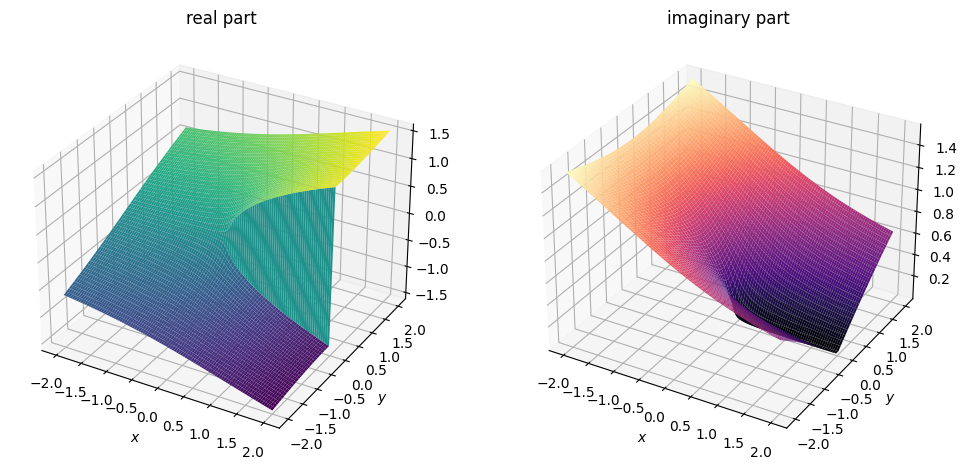

In [5]:
import matplotlib.pyplot as plt

# our definition of square root

def mySqrt(z):
    return 1j*np.sqrt(-z)

# Let's plot it

def argand_plot_3D(func):
    
    xmin, xmax, xnum = -2, 2, 100
    ymin, ymax, ynum = -2, 2, 50
    X, Y = np.meshgrid(np.linspace(xmin, xmax, xnum), np.linspace(ymin, ymax, ynum))
    Z = X+1j*Y
    ax1 = plt.gcf().add_subplot(121, projection = "3d")
    ax2 = plt.gcf().add_subplot(122, projection = "3d")
    ax1.plot_surface(X,Y,np.real(func(Z)), rstride = 1, cstride = 1, cmap="viridis")
    ax1.set_xlabel(r"$x$")
    ax1.set_ylabel(r"$y$")
    ax1.set_title("real part")
    ax2.plot_surface(X,Y,np.imag(func(Z)), rstride = 1, cstride = 1, cmap="magma")
    ax2.set_xlabel(r"$x$")
    ax2.set_ylabel(r"$y$")
    ax2.set_title("imaginary part")
    
plt.figure(figsize = (12,14), dpi = 100)
argand_plot_3D(mySqrt)

# Two Particle Kinematics

## 3

We will use the usual square root so that we can plug in real positive values of $s$.

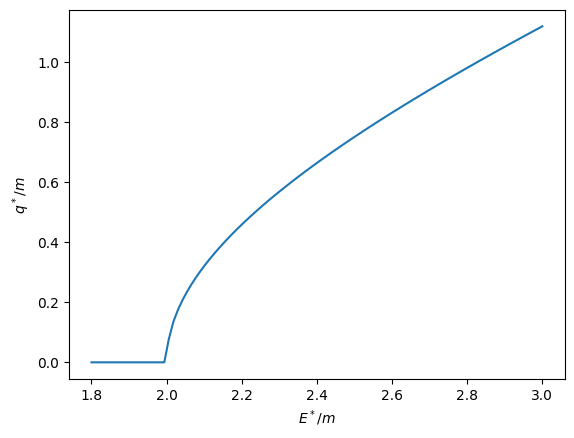

In [30]:
def q(s):
    return np.sqrt(s-4)/2

def plot_2D(func,name):
    eps = 1e-16
    Emin, Emax, Enum = 1.8, 3.0, 100
    E = np.linspace(Emin, Emax, Enum)
    plt.plot(E, func(E**2+1j*eps))
    plt.xlabel(r"$E^*/m$")
    plt.ylabel(name)
    
plot_2D(q,r"$q^*/m$")

There was an error because the minimum value of $E^*$ in a physical system is of course $2m$. This error was avoided by adding an infinitesimally small imaginary part to the energies. Furthermore, at high energies $E^*=2\sqrt{m^2+\vec{q}^2}\approx 2\|\vec{q}\|$, which explains why it looks like a straight line for high energies.

# Two-particle Phase Space

## 4

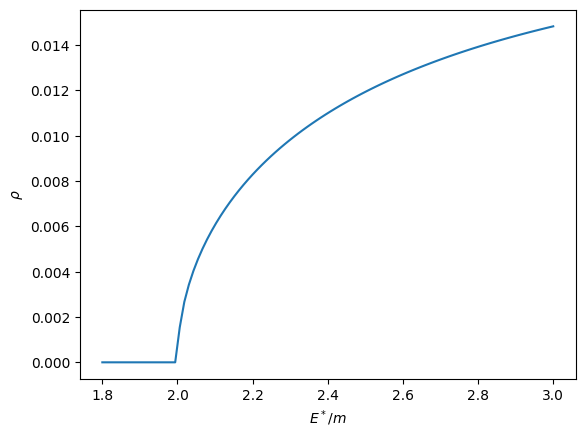

In [49]:
def rho(s):
    return q(s)/(8*np.pi*np.sqrt(s))

plot_2D(rho,r"$\rho$")

## 5

Text(0.5, 0.92, 'imaginary part')

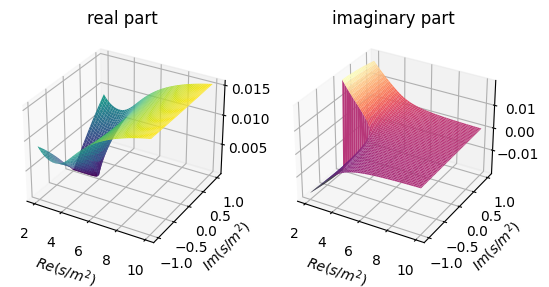

In [32]:
X, Y = np.meshgrid(np.linspace(2, 10, 100), np.linspace(-1, 1, 50))
Z = X + 1j*Y
fig = plt.figure()
ax1 = fig.add_subplot(121, projection = "3d")
ax2= fig.add_subplot(122, projection = "3d")
ax1.plot_surface(X, Y, np.real(rho(Z)), cmap = "viridis")
ax2.plot_surface(X, Y, np.imag(rho(Z)), cmap = "magma")
ax1.set_xlabel(r"$Re(s/m^2)$")
ax2.set_xlabel(r"$Re(s/m^2)$")
ax1.set_ylabel(r"$Im(s/m^2)$")
ax2.set_ylabel(r"$Im(s/m^2)$")
ax1.set_title("real part")
ax2.set_title("imaginary part")

This is different from what was obtained in the original notebooks. This is because we used a the square root we defined at the beginning, which has the branch cut on the other side

# On-shell Amplitude

## 4

Text(0.5, 1.0, '$a=-2$ and $r=0$.')

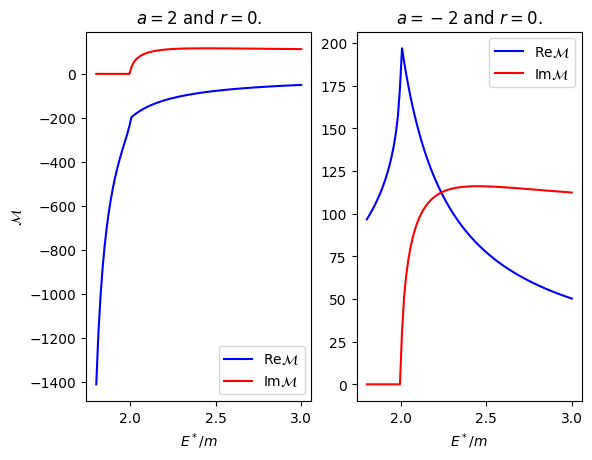

In [50]:
def M(s,a,r):
    return 8*np.pi*np.sqrt(s)/(0.5*(-(1/a)+0.5*r*q(s)**2-1j*q(s)))

E=np.linspace(1.8, 3, 100)
eps=1e-16

a1=2
a2=-2
r=0
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2)
ax1.plot(E, np.real(M(E**2+1j*eps, a1, r)), color = 'blue', label=r'Re$\mathcal{M}$')
ax1.plot(E, np.imag(M(E**2+1j*eps, a1, r)), color = 'red', label=r'Im$\mathcal{M}$')
ax1.set_xlabel(r'$E^*/m$')
ax1.set_ylabel(r'$\mathcal{M}$')
ax1.legend()
ax1.set_title(r'$a={}$ and $r={}$.'.format(a1,r))
ax2.plot(E, np.real(M(E**2+1j*eps, a2, r)), color = 'blue', label=r'Re$\mathcal{M}$')
ax2.plot(E, np.imag(M(E**2+1j*eps, a2, r)), color = 'red', label=r'Im$\mathcal{M}$')
ax2.set_xlabel(r'$E^*/m$')
ax2.legend()
ax2.set_title(r'$a={}$ and $r={}$.'.format(a2,r))

The error is due to the values of $E^*<2$, where the expression we gave for $q^*$ is not well defined. Following the notebook, the error was subsequently eliminated by including a small positive imaginary part for $s$.

## 5

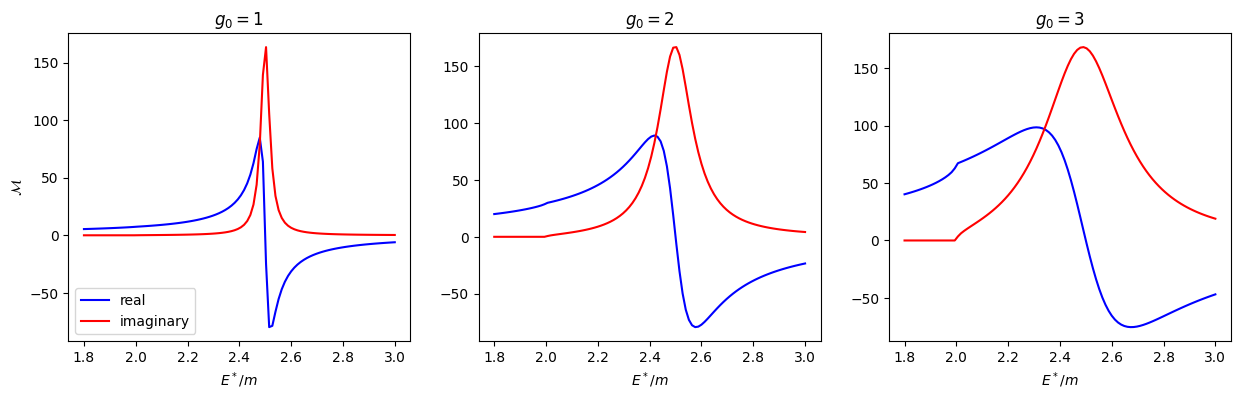

In [83]:
def M(s, m, g):
    return 8*np.pi*np.sqrt(s)/(0.5*(q(s)*((m**2-s)/(np.sqrt(s)*Gamma(s, m, g)))-1j*q(s)))

def Gamma(s, m, g):
    return (g**2)*(m**2)*q(s)/(6*np.pi*s)

E = np.linspace(1.8, 3, 100)
eps = 1e-16
g1 = 1
g2 = 2
g3 = 3
m = 2.5
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,4))
ax1.plot(E, np.real(M(E**2+1j*eps, m, g1)), color = 'blue', label = 'real')
ax2.plot(E, np.real(M(E**2+1j*eps, m, g2)), color = 'blue', label = 'real')
ax3.plot(E, np.real(M(E**2+1j*eps, m, g3)), color = 'blue', label = 'real')
ax1.plot(E, np.imag(M(E**2+1j*eps, m, g1)), color = 'red', label = 'imaginary')
ax2.plot(E, np.imag(M(E**2+1j*eps, m, g2)), color = 'red', label = 'imaginary')
ax3.plot(E, np.imag(M(E**2+1j*eps, m, g3)), color = 'red', label = 'imaginary')
ax1.set_ylabel(r'$\mathcal{M}$')
ax1.set_xlabel(r'$E^*/m$')
ax2.set_xlabel(r'$E^*/m$')
ax3.set_xlabel(r'$E^*/m$')
ax1.set_title(r'$g_0={}$'.format(g1))
ax2.set_title(r'$g_0={}$'.format(g2))
ax3.set_title(r'$g_0={}$'.format(g3))
ax1.legend(loc = 'lower left')

## 6

Text(0.5, 0.92, 'Im$\\mathcal{M}$')

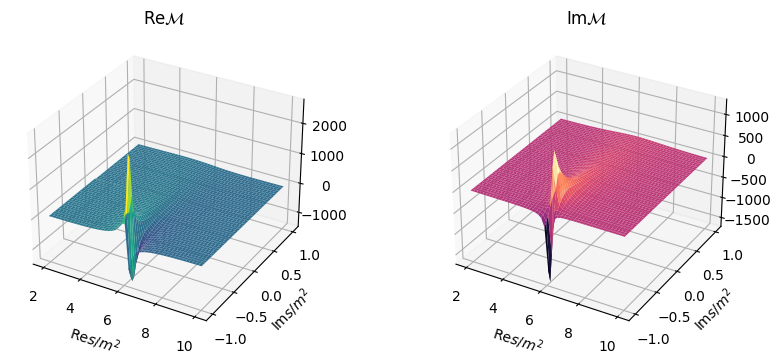

In [97]:
x = np.linspace(2, 10, 50)
y = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(x, y)
Z = X + 1j*Y

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, subplot_kw={"projection": "3d"}, figsize = (10,4))
ax1.plot_surface(X, Y, np.real(M(Z, m, g3)), cmap = 'viridis')
ax2.plot_surface(X, Y, np.imag(M(Z, m, g3)), cmap = 'magma')
ax1.set_xlabel(r'Re$s/m^2$')
ax1.set_ylabel(r'Im$s/m^2$')
ax2.set_xlabel(r'Re$s/m^2$')
ax2.set_ylabel(r'Im$s/m^2$')
ax1.set_title(r'Re$\mathcal{M}$')
ax2.set_title(r'Im$\mathcal{M}$')



Let us actually redefine everything to check for any errors. Will do this in a new notebook.